# Multiclass Dog Breed Classification
This notebook contains and end-to-end multi-class image classifier using Tensorflow 2.0 and TensorFlow Hub

## 1.Problem: 
Identifying the breeds of dog given an image of a dog.

## 2. Data:
Data we are using is from Kaggle's dog breed identification Competition: 
https://www.kaggle.com/competitions/dog-breed-identification/overview

## 3. Evaluation: 

https://www.kaggle.com/competitions/dog-breed-identification/overview/evaluation

# 4. Features: 
Some information about the data: 
* Data is images, so best to use deep learning/ transfer learning.
* There are 120 Different breeds 
* there are 10,000+ images in Training Set (have labels)
* There are 10,000+ images in Test Set (don't have labels since we want to predict that) 

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

In [2]:
print(tf.__version__)
print("GPU", "Available" if tf.config.list_physical_devices('GPU') else "Not Found")

2.10.1
GPU Available


# 1. Ready Data

## Turning into Tensors

In [3]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)  # Show all rows

labels_csv = pd.read_csv("/Coding/AI_ML/7. UnSupervised Learning/data/labels.csv")
labels_csv.head(5)

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [4]:
labels_csv.describe()

,id,breed
count,10222,10222
unique,10222,120
top,000bec180eb18c7604dcecc8fe0dba07,scottish_deerhound
freq,1,126


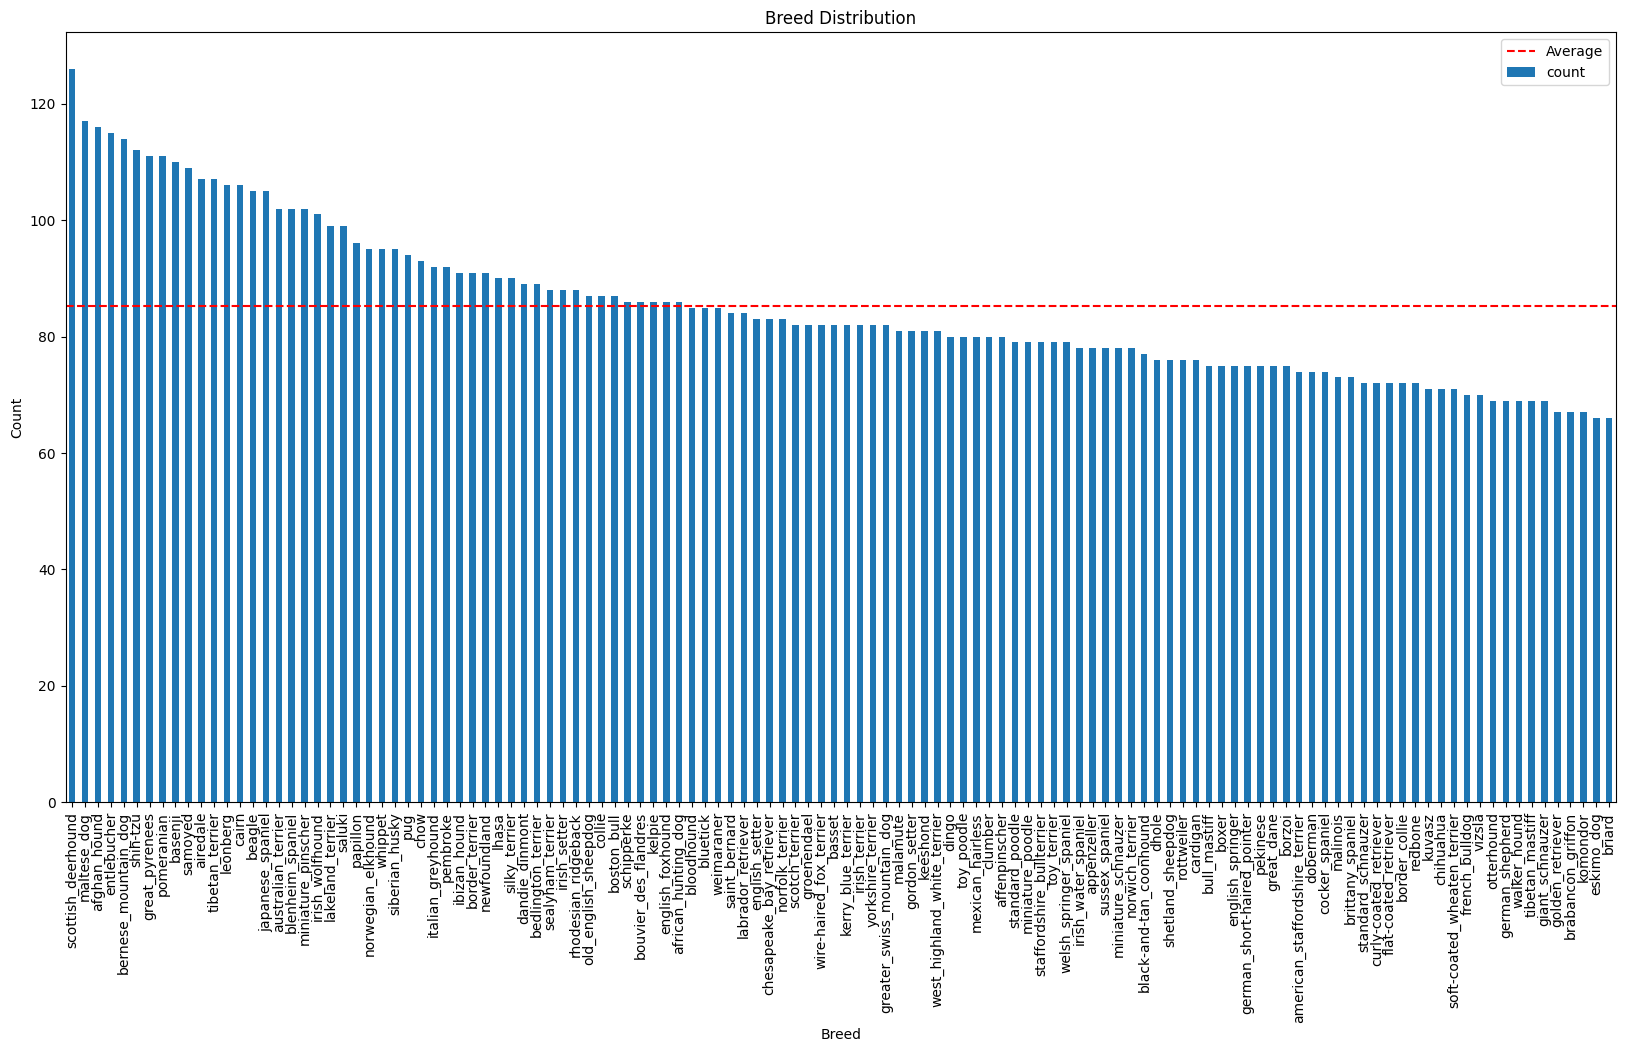

In [5]:
# Plot the bar chart
ax = labels_csv["breed"].value_counts().plot.bar(figsize=(20, 10))

# Calculate the average value
average_value = labels_csv["breed"].value_counts().mean()

# Add the average line
ax.axhline(average_value, color='red', linestyle='--', label='Average')

# Customize the plot as desired
plt.xlabel('Breed')
plt.ylabel('Count')
plt.title('Breed Distribution')
plt.legend();

## Getting images and their labels

* A list a filepaths to training images  
* An array of all labels  
* An array of all unique labels  

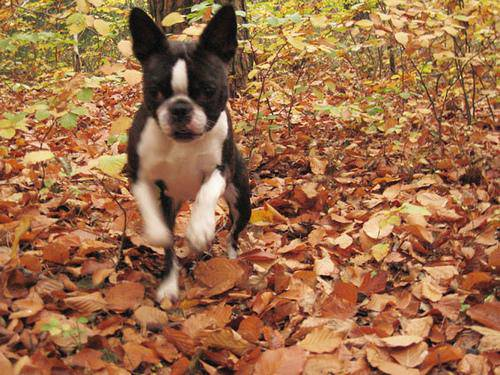

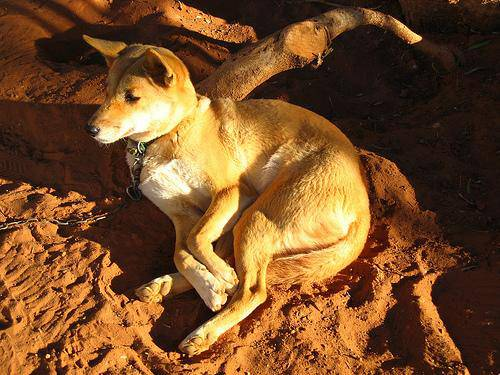

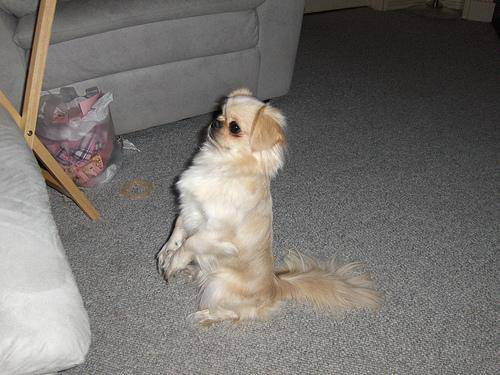

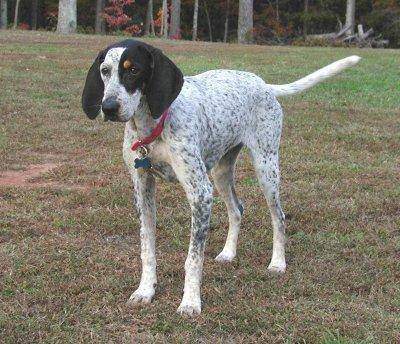

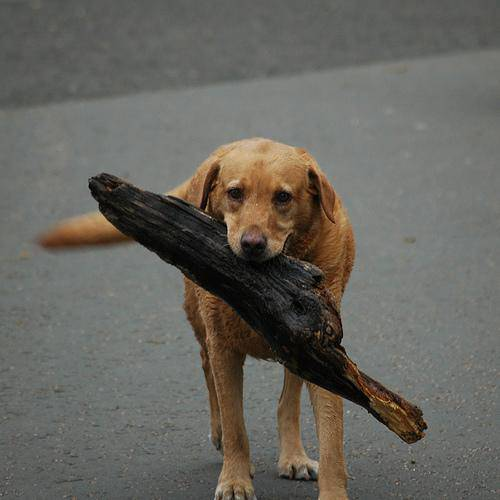

In [6]:
from IPython.display import Image

# Path to the image file
for image in labels_csv["id"].head():
    display(Image(filename="/Coding/AI_ML/7. UnSupervised Learning/data/train/"+image+".jpg", width=300, height=200))

### Get Filenames to all images

In [7]:
# So get the filenames of all using a similar for loop: AND STORE ITIN AN ARRAY
filenames = []
for image_id in labels_csv["id"]:
    filenames.append("/Coding/AI_ML/7. UnSupervised Learning/data/train/"+image_id+".jpg")

filenames

['/Coding/AI_ML/7. UnSupervised Learning/data/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/Coding/AI_ML/7. UnSupervised Learning/data/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/Coding/AI_ML/7. UnSupervised Learning/data/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/Coding/AI_ML/7. UnSupervised Learning/data/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/Coding/AI_ML/7. UnSupervised Learning/data/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/Coding/AI_ML/7. UnSupervised Learning/data/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/Coding/AI_ML/7. UnSupervised Learning/data/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/Coding/AI_ML/7. UnSupervised Learning/data/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/Coding/AI_ML/7. UnSupervised Learning/data/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/Coding/AI_ML/7. UnSupervised Learning/data/train/0042188c895a2f14ef64a918ed9c7b64.jpg',
 '/Coding/AI_ML/7. UnSupervised Learning/data/train/004396df1acd0f1247b740ca2b14616e.jpg',

In [8]:
# ACC TO KAGGLE DATA: IT HAS 10222 unique values
len(filenames)

# SO YES THAT CHECKS OUT, we have all the image locations

10222

In [9]:
# Check whether number of filenames matches number of actual image files
import os
if len(os.listdir("/Coding/AI_ML/7. UnSupervised Learning/data/train/")) == len(filenames):
  print("Filenames match actual amount of files!")
else:
  print("Filenames do not match actual amount of files, check the target directory.")

Filenames match actual amount of files!


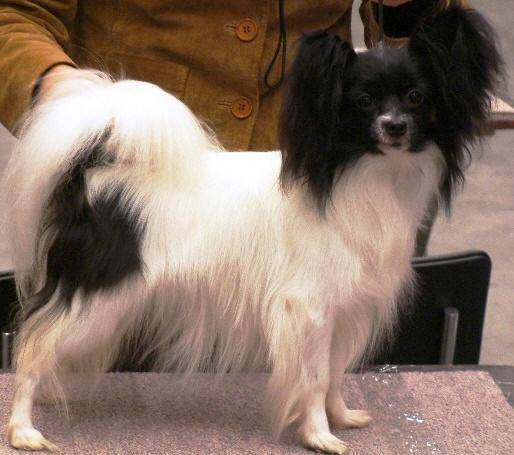

In [10]:
Image(filenames[8999])

### Labels
Now we've got our image filepaths together, let's get the labels.

We'll take them from labels_csv and turn them into a NumPy array.

In [11]:
labels = labels_csv["breed"].to_numpy() # converts directly into numpy array
# labels = np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [12]:
len(labels)

10222

### Checking if there is any missing data: Labels or images

It is not as simple in unstructured data: so we just have to check the length of labels and images to see whether there is any missing data or not.

In [13]:
if len(filenames) == len(labels):
    print("No missing Data")
else: 
    print("There is missing data !")

No missing Data


### Convert Breed into Numbers

In [14]:
unique_breeds = np.unique(labels)
len(unique_breeds) # since there are total 120 unique breeds according to the data

120

In [15]:
# EXAMPLE: Turn one label into an array of booleans:
# SO there will be 1 True value and other 119 False FOR ONE LABEL out of 10222 total labels.

print(labels[0])
labels[0] == unique_breeds # use comparison operator to create boolean array

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [16]:
# Turning EACH label into this kinda boolean array

boolean_labels = []

for label in labels:
    boolean_labels.append(label == unique_breeds)

In [17]:
boolean_labels[:1]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False])]

In [18]:
len(boolean_labels)

10222

### Split into Train Valid Test Set:


In [19]:
# Setup X & y variables
X = filenames
y = boolean_labels

Since we're working with 10,000+ images, it's a good idea to work with a portion of them to make sure things are working before training on them all.

This is because computing with 10,000+ images could take a fairly long time. And our goal when working through machine learning projects is to reduce the time between experiments.

Let's start experimenting with 1000 and increase it as we need.

In [20]:
# Set number of images to use for experimenting
NUM_IMAGES = 1000
NUM_IMAGES

1000

In [21]:
# Import train_test_split from Scikit-Learn
from sklearn.model_selection import train_test_split

# Split them into training and validation using NUM_IMAGES 
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES], 
                                                  test_size=0.2,
                                                  random_state=42)

len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [22]:
X_train[:2], y_train[:2]

(['/Coding/AI_ML/7. UnSupervised Learning/data/train/00bee065dcec471f26394855c5c2f3de.jpg',
  '/Coding/AI_ML/7. UnSupervised Learning/data/train/0d2f9e12a2611d911d91a339074c8154.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, 

## Preprocessing Images: Turning Images to Tensors

To preprocess our images into Tensors we're going to write a function which does a few things:
1. Takes an image filename as input.
2. Uses TensorFlow to read the file and save it to a variable, `image`.
3. Turn our `image` (a jpeg file) into Tensors.
4. Normalize our `image`
5. Resize the image to be of shape (224, 224).
6. Return the modified image.

In [23]:
# Convert Images to numpy arrays

from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

(257, 350, 3)

In [24]:
image[:1]

array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]]], dtype=uint8)

In [25]:
# You can turn almost anything into tensors by using: 
tf.constant(image)[:1]

<tf.Tensor: shape=(1, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]]], dtype=uint8)>

Ok, now let's build that function we were talking about.

In [26]:
IMG_SIZE = 224

def preprocess_image(image_path, img_size=IMG_SIZE):
    """
    Takes an image file path and turns it into a Tensor
    """
    
    # 1. Read an image:
    image = tf.io.read_file(image_path)
    # 2. Turn it into Numerical Tensor using 3 channels: RGB
    image = tf.image.decode_jpeg(image, channels=3)
    # 3. Normalization: Convert these 0-255 into 0-1 for each RGB
    image = tf.image.convert_image_dtype(image, tf.float32)
    # 4. Resize to our desired size: (224,224)
    image = tf.image.resize(image, size=[IMG_SIZE,IMG_SIZE])
    # 5. Return
    return image

In [27]:
# Examples: 
# 1. Turns the filepath into a Tensor of type String
tensor = tf.io.read_file(filenames[20])
tensor

<tf.Tensor: shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\n\x07\x07\x08\x07\x06\n\x08\x08\x08\x0b\n\n\x0b\x0e\x18\x10\x0e\r\r\x0e\x1d\x15\x16\x11\x18#\x1f%$"\x1f"!&+7/&)4)!"0A149;>>>%.DIC<H7=>;\xff\xdb\x00C\x01\n\x0b\x0b\x0e\r\x0e\x1c\x10\x10\x1c;("(;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;\xff\xc0\x00\x11\x08\x01w\x01\xf4\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca

In [28]:
# 2. Turn it into a Numerical Tensor which will have values 0-255 for RGB
tensor = tf.image.decode_jpeg(tensor, channels=3)
tensor

<tf.Tensor: shape=(375, 500, 3), dtype=uint8, numpy=
array([[[125, 128, 117],
        [121, 124, 113],
        [114, 120, 108],
        ...,
        [ 96, 124,  65],
        [ 95, 123,  64],
        [ 99, 127,  68]],

       [[116, 119, 108],
        [112, 118, 106],
        [109, 115, 103],
        ...,
        [ 94, 122,  61],
        [ 92, 120,  59],
        [ 95, 123,  62]],

       [[112, 118, 108],
        [110, 118, 107],
        [109, 117, 106],
        ...,
        [ 92, 121,  57],
        [ 88, 117,  53],
        [ 89, 118,  54]],

       ...,

       [[228, 227, 225],
        [230, 229, 227],
        [232, 228, 227],
        ...,
        [217, 214, 209],
        [201, 198, 193],
        [189, 186, 181]],

       [[221, 220, 218],
        [233, 232, 230],
        [242, 238, 237],
        ...,
        [220, 217, 212],
        [219, 216, 211],
        [215, 212, 207]],

       [[239, 238, 236],
        [235, 234, 232],
        [226, 222, 221],
        ...,
        [207, 204, 19

In [29]:
# 3. Normalization
# Convert these numbers that are 0-255 for each RGB into 0-1 for each RGB for optimization
tf.image.convert_image_dtype(tensor, tf.float32)

<tf.Tensor: shape=(375, 500, 3), dtype=float32, numpy=
array([[[0.4901961 , 0.5019608 , 0.45882356],
        [0.47450984, 0.48627454, 0.4431373 ],
        [0.44705886, 0.47058827, 0.42352945],
        ...,
        [0.37647063, 0.48627454, 0.25490198],
        [0.37254903, 0.48235297, 0.2509804 ],
        [0.38823533, 0.49803925, 0.26666668]],

       [[0.454902  , 0.4666667 , 0.42352945],
        [0.43921572, 0.46274513, 0.4156863 ],
        [0.427451  , 0.45098042, 0.4039216 ],
        ...,
        [0.36862746, 0.4784314 , 0.2392157 ],
        [0.36078432, 0.47058827, 0.23137257],
        [0.37254903, 0.48235297, 0.24313727]],

       [[0.43921572, 0.46274513, 0.42352945],
        [0.43137258, 0.46274513, 0.41960788],
        [0.427451  , 0.45882356, 0.4156863 ],
        ...,
        [0.36078432, 0.47450984, 0.22352943],
        [0.34509805, 0.45882356, 0.20784315],
        [0.34901962, 0.46274513, 0.21176472]],

       ...,

       [[0.8941177 , 0.89019614, 0.882353  ],
        [0.90

### Turning Data into Batches

Since working with 10,000+ data entries all at once is not feasible for the memory, we turn the data into smaller batches
<br><br>
Batch Size is generally of size 32.
<br><br>
In order to use Tensorflow effectively, we must have them in the tuple: 
`(image, label)`

In [30]:
# Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
  """
  Create a simple function to return a tuple (image, label).
  Takes an image file path name and the associated label,
  processes the image and returns a tuple of (image, label).
  """
  image = preprocess_image(image_path)
  return image, label

In [31]:
y[10]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [32]:
# Example: 
get_image_label(X[10], tf.constant(y[10]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.41753423, 0.38224012, 0.40184796],
         [0.4316044 , 0.39631027, 0.4159181 ],
         [0.40602714, 0.37879497, 0.3957155 ],
         ...,
         [0.19028023, 0.17067239, 0.18635866],
         [0.28062278, 0.26101494, 0.2767012 ],
         [0.28965282, 0.27004498, 0.28573126]],
 
        [[0.36733648, 0.33204237, 0.3516502 ],
         [0.3150591 , 0.27976498, 0.29937282],
         [0.29561085, 0.26837867, 0.2852992 ],
         ...,
         [0.23583163, 0.21230222, 0.22014536],
         [0.2812507 , 0.25772128, 0.2655644 ],
         [0.26320195, 0.23967254, 0.24751568]],
 
        [[0.40703085, 0.3717367 , 0.3907143 ],
         [0.46396694, 0.42867282, 0.4476504 ],
         [0.5020599 , 0.47482777, 0.491118  ],
         ...,
         [0.27574417, 0.24076518, 0.24374136],
         [0.30945447, 0.27447549, 0.27745166],
         [0.25501153, 0.22003253, 0.22300872]],
 
        ...,
 
        [[0.26359692, 0.28712633

In [33]:
# Create a function to make batches:
BATCH_SIZE = 32

def create_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
    """
    Creates batches of data out of image (X) and label (y) pairs.
    Shuffles the data if it's training data but doesn't shuffle it if it's validation data.
    Also accepts test data as input (no labels).
    """
    if test_data: # NO LABELS SINCE TEST
        print("Creating Test Data Batches...")
        data_whole = tf.data.Dataset.from_tensor_slices((tf.constant(X),))
        data_batch = data_whole.map(preprocess_image).batch(BATCH_SIZE)
        return data_batch
    
    elif valid_data: # NO SHUFFLING REQUIRED
        print("Creating Valid Data Batches...")
        data_whole = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))
        data_batch = data_whole.map(get_image_label).batch(BATCH_SIZE)
        return data_batch
    
    else: # TRAINING SET: SHUFFLING ALSO REQUIRED
        print("Creating Training Data Batches...")
        data_whole = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))
        data_batch = data_whole.shuffle(buffer_size=len(X)).map(get_image_label).batch(BATCH_SIZE)
        return data_batch

In [34]:
# Creating training and validation Sets
train_data = create_batches(X_train, y_train)
val_data = create_batches(X_val , y_val, valid_data=True)

Creating Training Data Batches...
Creating Valid Data Batches...


In [35]:
# Now they are in Data Batches! 
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [36]:
# Visualising Data Batches

# Create a function for viewing images in a data batch
def show_25_images(images, labels):
    """
    Displays 25 images from a data batch.
    """
    # Setup the figure
    plt.figure(figsize=(10, 10))
    # Loop through 25 (for displaying 25 images)
    for i in range(25):
        # Create subplots (5 rows, 5 columns)
        ax = plt.subplot(5, 5, i+1)
        # Display an image
        plt.imshow(images[i])
        # Add the image label as the title
        plt.title(unique_breeds[labels[i].argmax()])
        # Turn gird lines off
        plt.axis("off")


In [37]:
# UNbatch the data to visualise it:
train_images, train_labels = next(train_data.as_numpy_iterator())
len(train_images), len(train_labels)

(32, 32)

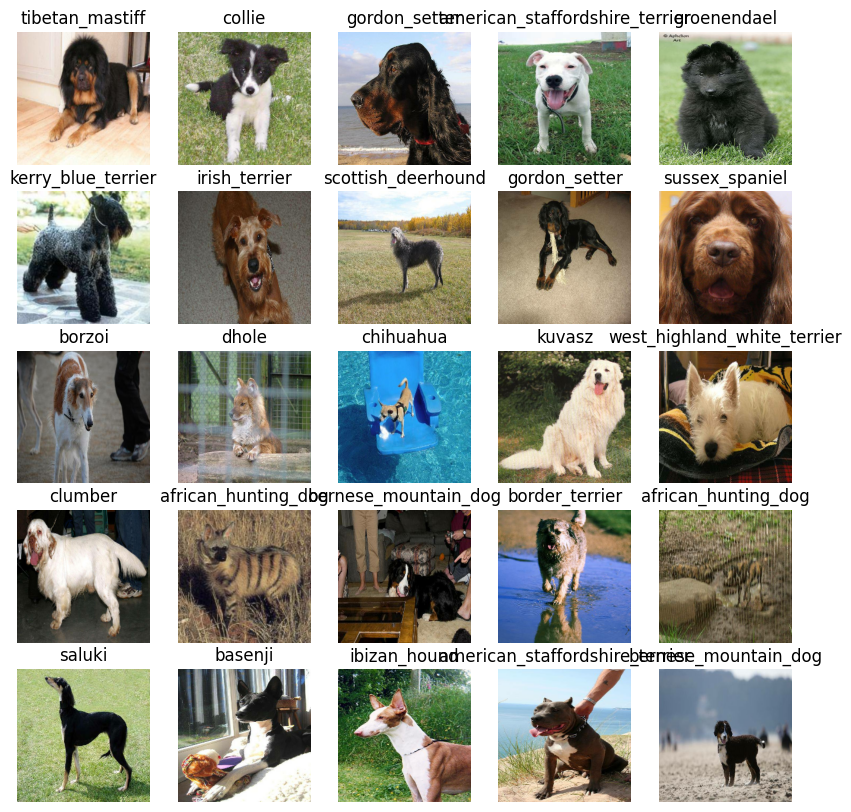

In [38]:
show_25_images(train_images, train_labels)

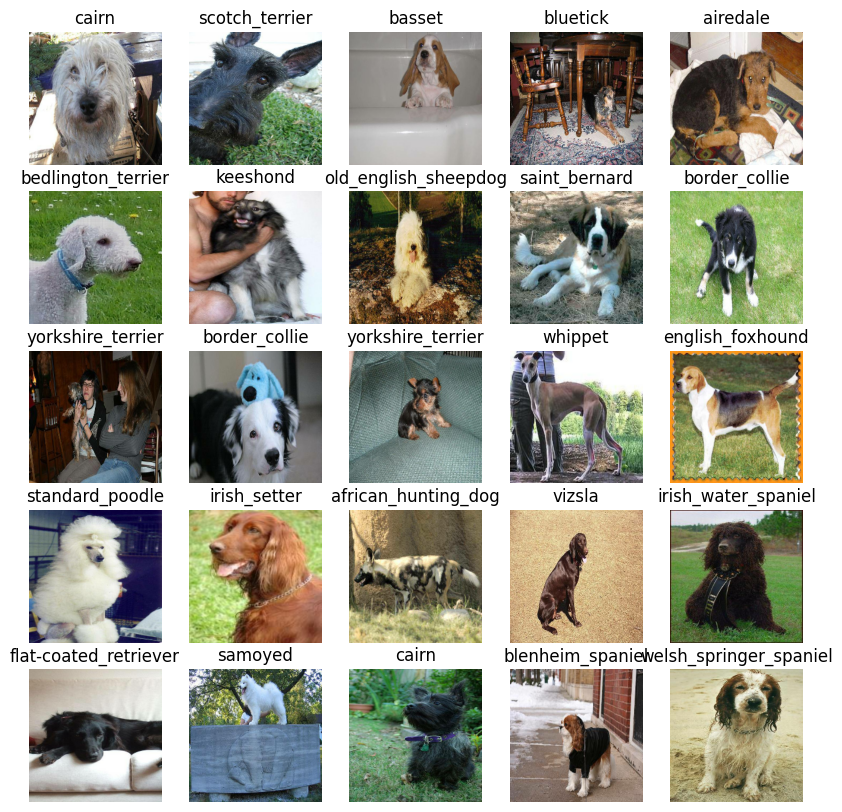

In [39]:
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

# Building a model

Before building a model, we need to define a few things:

* The input shape (Shape of images)
* The output shape (Shape of labels)
* The URL of the model we want to use

In [43]:
train_data.element_spec, IMG_SIZE

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 224)

In [45]:
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [44]:
# Shape of our images
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # Batch, height, width, color channels

# Shape of our labels
OUTPUT_SHAPE = len(unique_breeds)